In [14]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 7.1 MB/s eta 0:00:00


In [105]:
import yfinance as yf

# Defining the ticker symbol for the stock
ticker = "AAPL"

# Defining the start and end dates
start_date = "1999-01-01"
# Getting the current date
current_date = datetime.today().strftime('%Y-%m-%d')
end_date = current_date

# Fetching the historical stock data for the specified date range
df = yf.download(ticker, start=start_date, end=end_date)

# Print the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,0.376116,0.377232,0.357143,0.368304,0.313037,952884800
1999-01-05,0.374442,0.392299,0.370536,0.386719,0.328689,1410113600
1999-01-06,0.393973,0.393973,0.366071,0.372768,0.316831,1348569600
1999-01-07,0.377232,0.402344,0.376116,0.401786,0.341495,1429019200
1999-01-08,0.415737,0.418527,0.392857,0.401786,0.341495,678832000
...,...,...,...,...,...,...
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300


In [106]:
# Get the number of rows and columns in the data set
df.shape

(6168, 6)

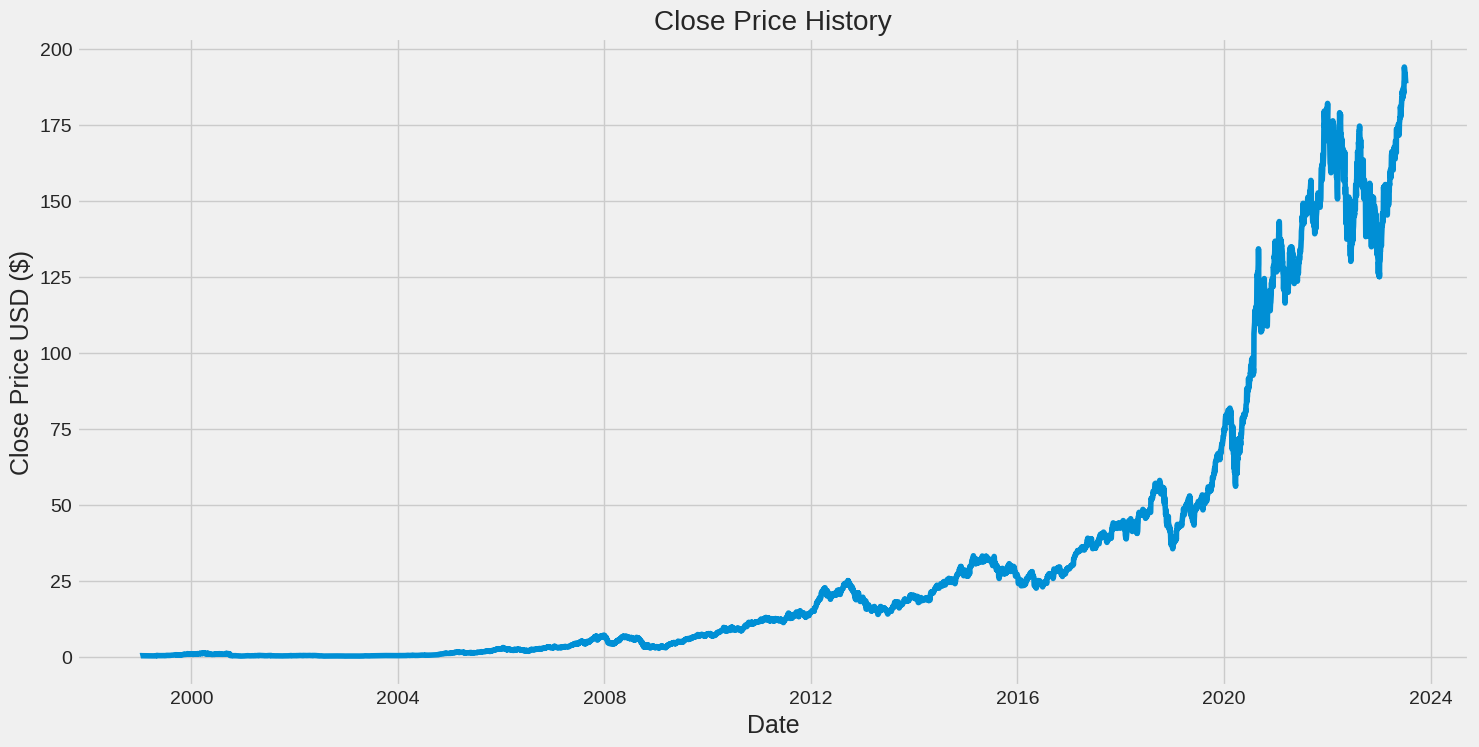

In [107]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [120]:
df = df.reset_index()

In [121]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,0.376116,0.377232,0.357143,0.368304,0.313037,952884800
1,1999-01-05,0.374442,0.392299,0.370536,0.386719,0.328689,1410113600
2,1999-01-06,0.393973,0.393973,0.366071,0.372768,0.316831,1348569600
3,1999-01-07,0.377232,0.402344,0.376116,0.401786,0.341495,1429019200
4,1999-01-08,0.415737,0.418527,0.392857,0.401786,0.341495,678832000


In [122]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [114]:
print(df.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-01-04    0.376116    0.377232    0.357143    0.368304    0.313037   
1999-01-05    0.374442    0.392299    0.370536    0.386719    0.328689   
1999-01-06    0.393973    0.393973    0.366071    0.372768    0.316832   
1999-01-07    0.377232    0.402344    0.376116    0.401786    0.341495   
1999-01-08    0.415737    0.418527    0.392857    0.401786    0.341495   
...                ...         ...         ...         ...         ...   
2023-07-03  193.779999  193.880005  191.759995  192.460007  192.460007   
2023-07-05  191.570007  192.979996  190.619995  191.330002  191.330002   
2023-07-06  189.839996  192.020004  189.199997  191.809998  191.809998   
2023-07-07  191.410004  192.669998  190.240005  190.679993  190.679993   
2023-07-10  189.259995  189.990005  187.039993  188.610001  188.610001   

     

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6.168000e+03
mean,31.493922,31.848369,31.153573,31.516395,30.318648,4.122891e+08
std,46.345920,46.897856,45.838034,46.396005,46.199761,3.871186e+08
min,0.231964,0.235536,0.227143,0.234286,0.199130,3.145820e+07
25%,1.300000,1.328214,1.278929,1.293035,1.099006,1.384714e+08
50%,12.249286,12.323393,12.098750,12.233393,10.397683,2.988958e+08
75%,36.276876,36.577498,35.992499,36.414376,34.267632,5.476492e+08
max,193.779999,194.479996,191.759995,193.970001,193.970001,7.421641e+09


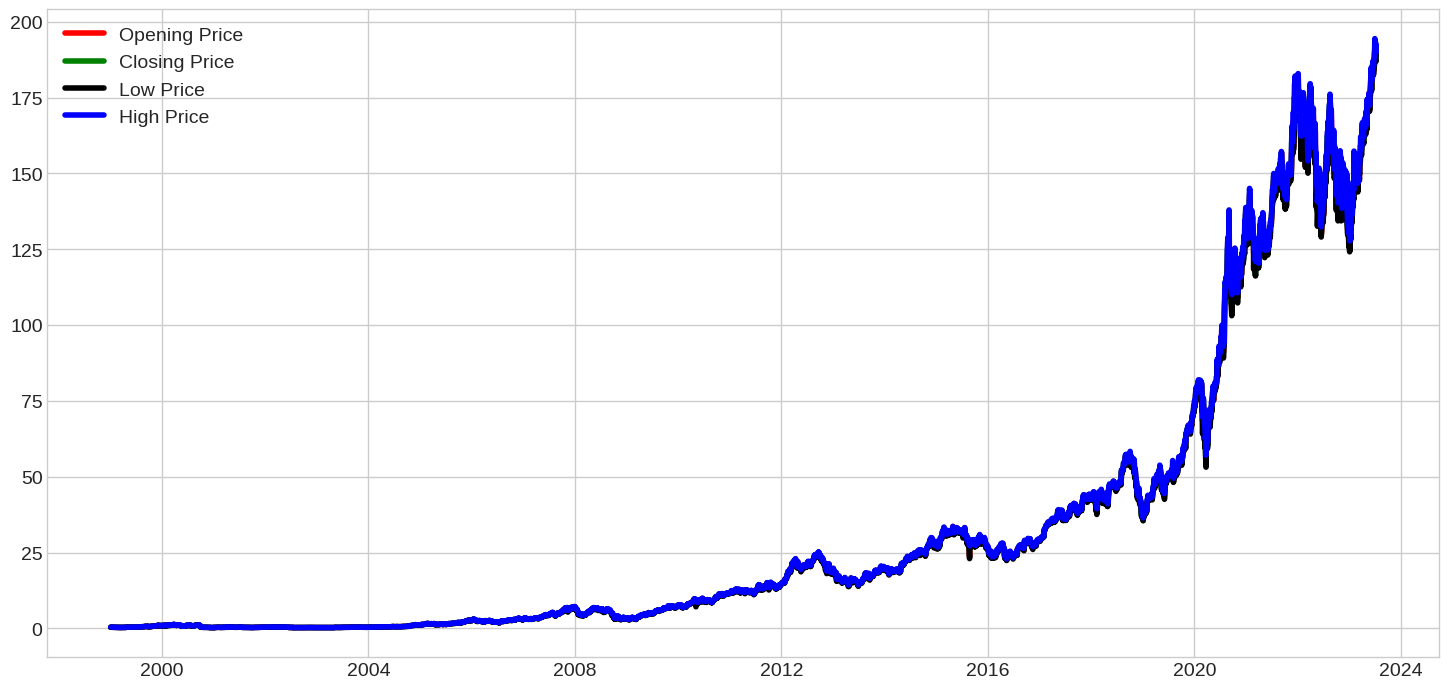

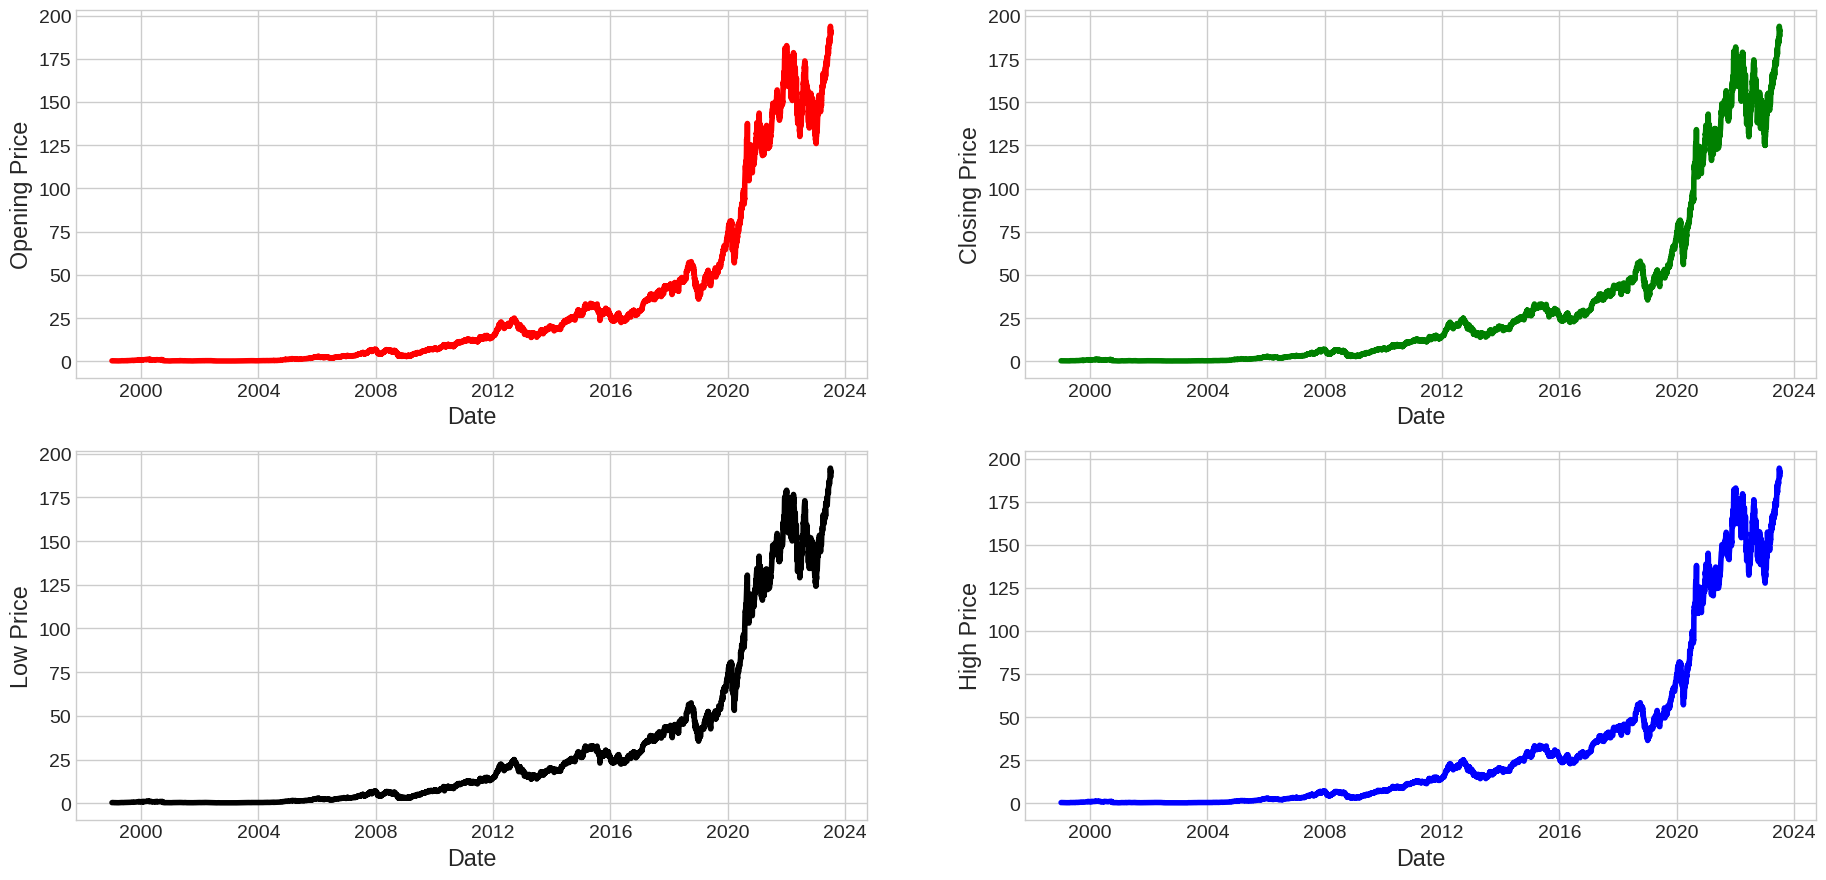

In [9]:

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Close'], color='green', label = 'Closing Price')
plt.plot(df['Low'], color='black', label = 'Low Price')
plt.plot(df['High'], color='blue', label = 'High Price')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (20, 10))

ax1 = plt.subplot(2, 2, 1)
plt.plot(df['Open'], color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')

ax2 = plt.subplot(2, 2, 2)
plt.plot(df['Close'], color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')

ax3 = plt.subplot(2, 2, 3)
plt.plot(df['Low'], color='black')
plt.xlabel('Date')
plt.ylabel('Low Price')

ax4 = plt.subplot(2, 2, 4)
plt.plot(df['High'], color='blue')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.legend(loc='best')

In [10]:
# Creating a new dataframe with only the 'Close' column
data = df[['Close']].copy()

# Convert the DataFrame to a NumPy array
dataset = data.values

# Getting the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

4935

In [11]:
data

,Close
Date,
1999-01-04,0.368304
1999-01-05,0.386719
1999-01-06,0.372768
1999-01-07,0.401786
1999-01-08,0.401786
...,...
2023-07-03,192.460007
2023-07-05,191.330002
2023-07-06,191.809998


In [12]:
dataset

array([[  0.36830401],
       [  0.38671899],
       [  0.37276801],
       ...,
       [191.80999756],
       [190.67999268],
       [188.61000061]])

In [13]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.91756905e-04],
       [7.86808942e-04],
       [7.14798607e-04],
       ...,
       [9.88850772e-01],
       [9.83018059e-01],
       [9.72333441e-01]])

In [27]:
# Creating the training data set
# Creating the scaled training data set
train_data = scaled_data[0:training_data_len, : ]
# Split the data into x_train and y_train data sets
x_train = [] # The x_train dataset contains the input features for the model, which are the past 60 values from the 'Close' column of the training data. Each element of x_train is an array of 60 values, representing a sequence of historical data.
y_train = [] # The y_train dataset contains the target values for the model, which are the next values in the 'Close' column following the corresponding sequence of 60 values in x_train. Each element of y_train is a single value.

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) # In this line, we are appending a subset of the train_data array to the x_train dataset. The subset contains the past 60 values from the 'Close' column, starting from the index i-60 up to (but not including) index i. The 0 as the second index (0 in [i-60:i, 0]) specifies that we are selecting only the values from the first column of the subset (i.e., the 'Close' values).
  y_train.append(train_data[i,0]) # In this line, we are appending a single value to the y_train dataset. The value is taken from the 'Close' column of the train_data array at index i. This value represents the next value following the sequence of 60 values in x_train and corresponds to the target value that the model needs to predict.
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00069176, 0.00078681, 0.0007148 , 0.00086458, 0.00086458,
       0.0009049 , 0.00091642, 0.00093371, 0.00069752, 0.00069464,
       0.00067447, 0.00066007, 0.00057942, 0.00057654, 0.00060535,
       0.00065719, 0.00063991, 0.00067447, 0.00068888, 0.00067735,
       0.0005967 , 0.00064279, 0.00053622, 0.0004642 , 0.00053045,
       0.00050453, 0.00055638, 0.00061687, 0.00052757, 0.00055638,
       0.00049589, 0.0004498 , 0.00050453, 0.00056214, 0.00056214,
       0.00051605, 0.00049301, 0.00039507, 0.00034611, 0.00038643,
       0.00036627, 0.0003317 , 0.00032018, 0.00037491, 0.00036339,
       0.00029138, 0.0002741 , 0.00032018, 0.00036051, 0.00042676,
       0.00036051, 0.00042676, 0.00033458, 0.0004066 , 0.00031154,
       0.00034323, 0.00034899, 0.00032306, 0.000421  , 0.00044404])]
[0.0004469232740935095]

[array([0.00069176, 0.00078681, 0.0007148 , 0.00086458, 0.00086458,
       0.0009049 , 0.00091642, 0.00093371, 0.00069752, 0.00069464,
       0.00067447, 0.00066007, 0.

In [28]:
# Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
# Reshaping the data ("Why do we need to reshape the data? The LSTM network expects the input to be 3 dimensional in the form of number of samples, number of timestamps and number of features right now we have only 2 dimensional")
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Its the same as (4868, 60 , 1)
x_train.shape

(4875, 60, 1)

# Building The Model

In [ ]:
# import numpy as np
# import tensorflow as tf

# # Set the random seed for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile and train the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, batch_size=1, epochs=50)


In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))# First LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_168 (LSTM)             (None, 60, 50)            10400     
                                                                 
 dropout_168 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_169 (LSTM)             (None, 50)                20200     
                                                                 
 dropout_169 (Dropout)       (None, 50)                0         
                                                                 
 dense_168 (Dense)           (None, 25)                1275      
                                                                 
 dense_169 (Dense)           (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-tra

In [ ]:
# # Training the model
# model.fit(x_train, y_train, batch_size=1, epochs=20)
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Fit the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
122/122 [==============================] - 7s 15ms/step - loss: 1.0190e-04 - val_loss: 4.9940e-05
Epoch 2/20
122/122 [==============================] - 1s 9ms/step - loss: 1.9939e-05 - val_loss: 1.3866e-04
Epoch 3/20
122/122 [==============================] - 1s 9ms/step - loss: 1.8119e-05 - val_loss: 7.6330e-05
Epoch 4/20
122/122 [==============================] - 1s 9ms/step - loss: 2.2505e-05 - val_loss: 7.5671e-05
Epoch 5/20
122/122 [==============================] - 1s 9ms/step - loss: 1.6446e-05 - val_loss: 4.3526e-05
Epoch 6/20
122/122 [==============================] - 1s 9ms/step - loss: 1.7333e-05 - val_loss: 1.0145e-04
Epoch 7/20
122/122 [==============================] - 1s 10ms/step - loss: 1.6475e-05 - val_loss: 9.7572e-05
Epoch 8/20
122/122 [==============================] - 2s 12ms/step - loss: 1.6781e-05 - val_loss: 1.1278e-04
Epoch 9/20
122/122 [==============================] - 1s 9ms/step - loss: 1.5116e-05 - val_loss: 2.5936e-05
Epoch 10/20
122/122 [====

In [ ]:
# model.save('keras_model1.h5')

In [16]:
model = load_model('keras_model2.h5')

In [17]:
# Creating the testing data set
# Creating a new array containing scaled values from index 4868 to 6160
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # y_test contains the actual values or the 60 first values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0]) # x_test dataset contains the past 60 values


In [18]:
# Converting the data to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # (number of samples, number of timesteps, number of features "which is the close price")

In [20]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

39/39 [==============================] - 8s 4ms/step


In [21]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
print("The RMSE for the model is: ",rmse)

The RMSE for the model is:  5.498349739687286


In [22]:
# Mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions)
print("The MAE for the model is: ", mae)

The MAE for the model is:  5.996912010298061


In [23]:
# R-squared
r2 = r2_score(y_test,predictions)
print("The R2 value is: ", r2)

The R2 value is:  0.9711357372798666


<ipython-input-37-33891a99e474>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


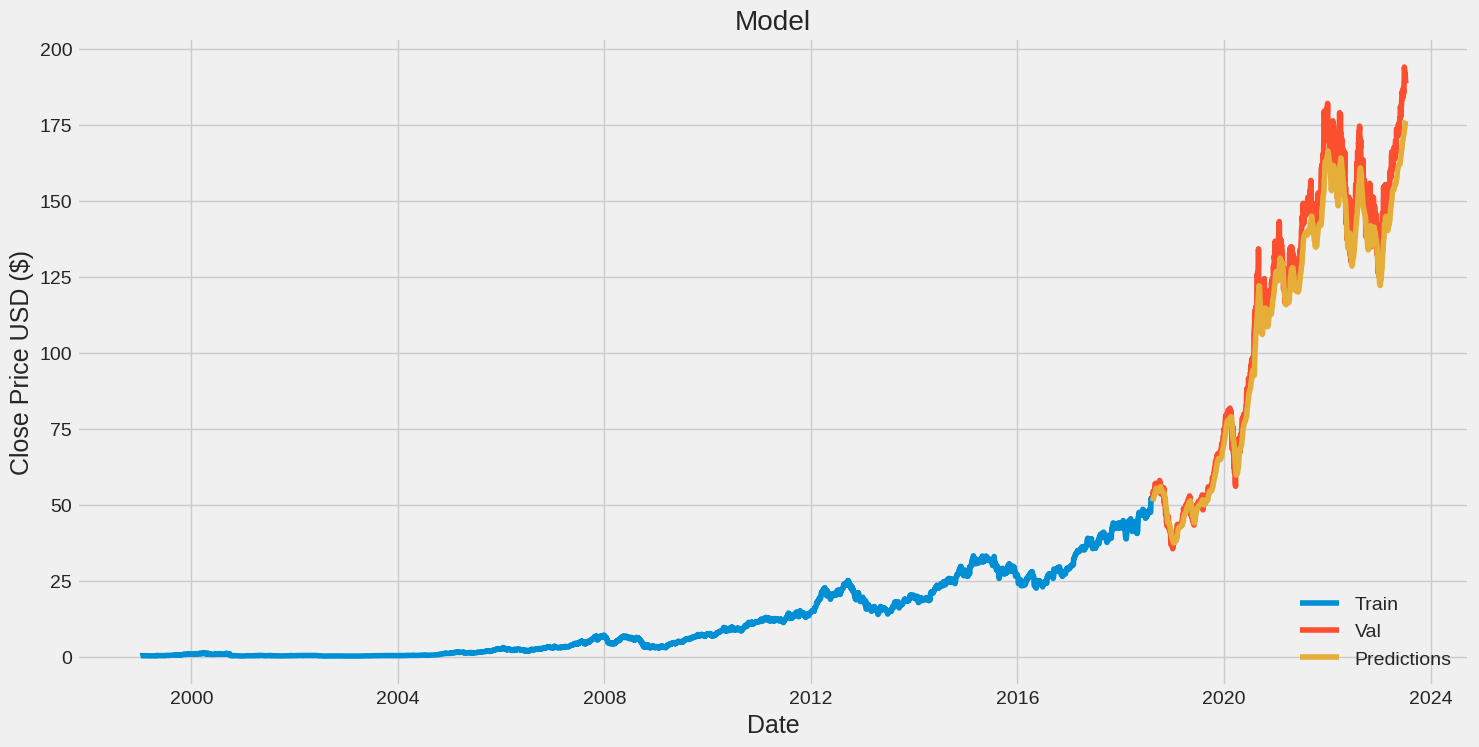

In [37]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-14,52.437500,51.121204
2018-08-15,52.560001,51.350712
2018-08-16,53.330002,51.548424
2018-08-17,54.395000,51.768093
2018-08-20,53.865002,52.064384
...,...,...
2023-07-03,192.460007,173.948898
2023-07-05,191.330002,174.736740
2023-07-06,191.809998,175.397659


In [42]:
apple_quote = yf.download(ticker, start=start_date, end=end_date)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 27ms/step
[[133.44069]]


In [43]:
# Get the quote
# Define the start and end dates
start_date_1 = "2023-06-29"
end_date_1 = "2023-06-30"
apple_quote2 = yf.download(ticker, start=start_date_1, end=end_date_1)
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-06-29    189.589996
Name: Close, dtype: float64


# Hyperparameter Tuning

In [44]:
from keras.metrics import RootMeanSquaredError

def create_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[RootMeanSquaredError()])
    return model

In [45]:
model = KerasRegressor(build_fn=create_model, verbose=0)

<ipython-input-45-fd86a7684fc9>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [46]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from keras.callbacks import EarlyStopping
# Defining the hyperparameters to tune
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [40,50]
}

# #Creating the EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform GridSearchCV for hyperparameter tuning
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [48]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 50, 'learning_rate': 0.001, 'units': 100}


In [49]:
print("The Best Model: ", best_model)

The Best Model:  <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f66af779060>


In [76]:
from keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a new model with the best hyperparameters
best_model = create_model(units=best_params['units'], dropout_rate=best_params['dropout_rate'], learning_rate=best_params['learning_rate'])

# Fit the model with the best hyperparameters and early stopping
best_model.fit(x_train, y_train, validation_split=0.2, epochs=best_params['epochs'], batch_size=best_params['batch_size'], callbacks=[early_stopping])


Epoch 1/50
61/61 [==============================] - 5s 30ms/step - loss: 1.5290e-04 - root_mean_squared_error: 0.0124 - val_loss: 6.1350e-05 - val_root_mean_squared_error: 0.0078
Epoch 2/50
61/61 [==============================] - 1s 10ms/step - loss: 1.5728e-05 - root_mean_squared_error: 0.0040 - val_loss: 4.9888e-05 - val_root_mean_squared_error: 0.0071
Epoch 3/50
61/61 [==============================] - 1s 9ms/step - loss: 1.2486e-05 - root_mean_squared_error: 0.0035 - val_loss: 2.9703e-05 - val_root_mean_squared_error: 0.0055
Epoch 4/50
61/61 [==============================] - 1s 9ms/step - loss: 1.1605e-05 - root_mean_squared_error: 0.0034 - val_loss: 2.7518e-05 - val_root_mean_squared_error: 0.0052
Epoch 5/50
61/61 [==============================] - 1s 9ms/step - loss: 1.0780e-05 - root_mean_squared_error: 0.0033 - val_loss: 3.9349e-05 - val_root_mean_squared_error: 0.0063
Epoch 6/50
61/61 [==============================] - 1s 9ms/step - loss: 9.4472e-06 - root_mean_squared_error

In [93]:
# Creating the testing data set
# Creating a new array containing scaled values from index 4868 to 6160
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # y_test contains the actual values or the 60 first values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0]) # x_test dataset contains the past 60 values


In [78]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [79]:
# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # (number of samples, number of timesteps, number of features "which is the close price")

In [81]:
# Get the models predicted price values
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

39/39 [==============================] - 1s 5ms/step


In [128]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
print("The RMSE for the model is: ",rmse)

The RMSE for the model is:  3.008099403597916


In [127]:
# Mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions)
print("The MAE for the model is: ", mae)

The MAE for the model is:  3.9634792887864805


In [126]:
# R-squared
r2 = r2_score(y_test,predictions)
print("The R2 value is: ", r2)

The R2 value is:  0.9869599736160133


In [124]:
# Calculate the mean percentage error (MPE)
mpe = np.mean((y_test - predictions) / y_test) * 100

print("Mean Percentage Error (MPE):", mpe)

Mean Percentage Error (MPE): 2.220211872581812


In [125]:
# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 3.3684000741402715


In [129]:
best_model.save("best_model3.h5")

<ipython-input-87-33891a99e474>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


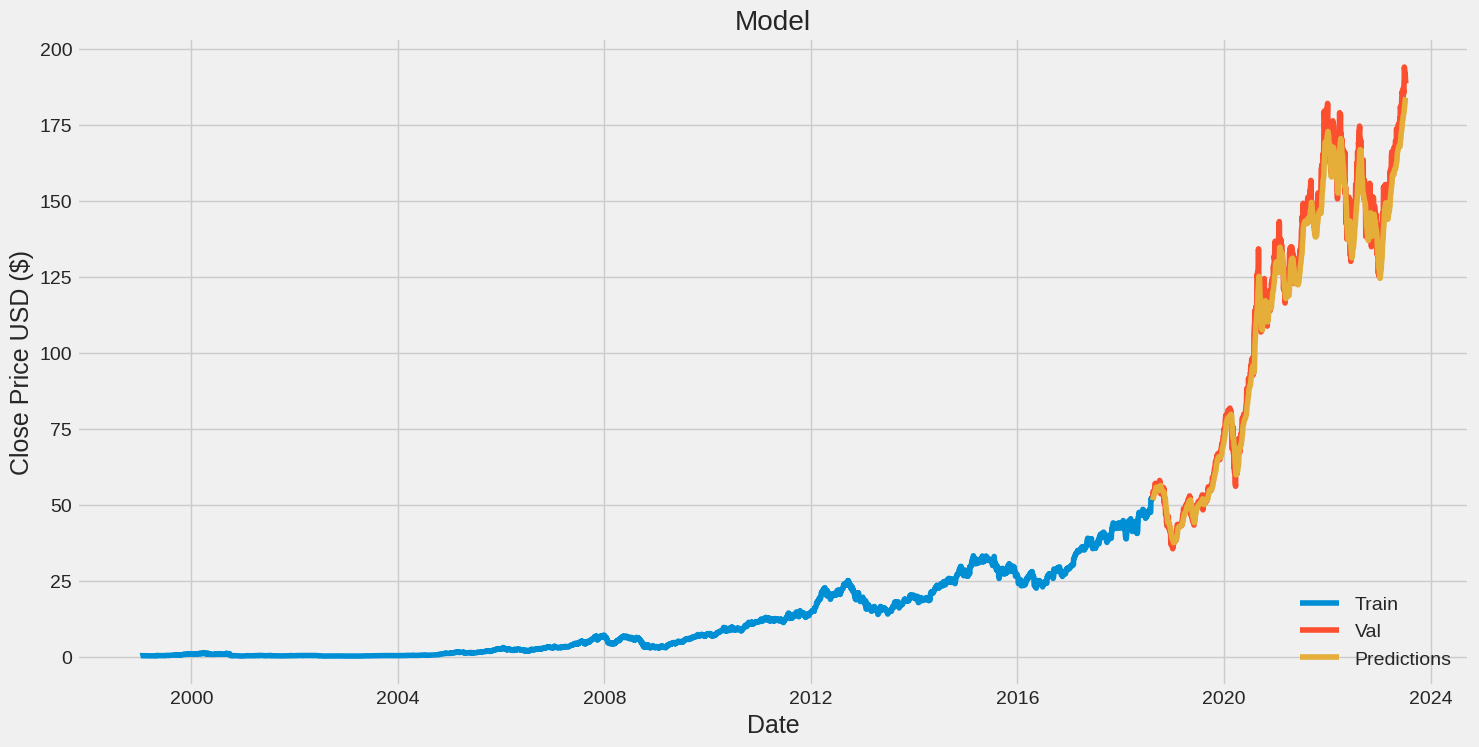

In [87]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [88]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-14,52.437500,51.521461
2018-08-15,52.560001,51.730957
2018-08-16,53.330002,51.911469
2018-08-17,54.395000,52.125679
2018-08-20,53.865002,52.434380
...,...,...
2023-07-03,192.460007,181.332733
2023-07-05,191.330002,182.256775
2023-07-06,191.809998,182.999664


In [91]:
apple_quote = yf.download(ticker, start=start_date, end=end_date)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = best_model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
print(end_date)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[184.01277]]
2023-07-11


In [92]:
# Define the start and end dates
start_date_1 = "2023-06-29"
end_date_1 = "2023-07-11"
apple_quote2 = yf.download(ticker, start=start_date_1, end=end_date_1)
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-06-29    189.589996
2023-06-30    193.970001
2023-07-03    192.460007
2023-07-05    191.330002
2023-07-06    191.809998
2023-07-07    190.679993
2023-07-10    188.610001
Name: Close, dtype: float64
